In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from api_keys import api_key
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

today = str(date.today())


Temp= []
lat = []
cities = []
city_ID = []
Temp= []
Humidity= []
Cloudiness = []
Wind = []
removed_cities=[]
running_cities=[]

## Generate Cities List

In [2]:

while len(Temp)<500: 
    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=100)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)


    cities_out = cities

    url = "http://api.openweathermap.org/data/2.5/weather?"

    for city in cities:
    #city= "London"
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        query_url
        weather_response = requests.get(query_url)
        weather_json = weather_response.json() 
        
        try:
            Temp.append(weather_json['main']['temp'])
            running_cities.append(weather_json['name'])
            Humidity.append(weather_json['main']['humidity'])
            Cloudiness.append(weather_json['clouds']['all'])
            Wind.append(weather_json['wind']['speed'])
            lat.append(weather_json['coord']['lat'])
            city_ID.append(weather_json['id'])

        except KeyError: 
            removed_cities.append(city)
            cities_out.remove(city)
    


In [3]:
print(len(removed_cities))
len(Temp) >500
print(len(running_cities))
print(len(Humidity))
print(len(Cloudiness))
print(len(Wind))
print(len(lat))
len(Temp) >500

27
531
531
531
531
531


True

In [4]:
df=pd.DataFrame({'City Name':running_cities,'City ID':city_ID,'Latitude':lat,'Temperatures':Temp,'Humidity':Humidity,'Cloudiness':Cloudiness,'Wind Speed':Wind})
df.head()

,City Name,City ID,Latitude,Temperatures,Humidity,Cloudiness,Wind Speed
0,Cherskiy,2126199,68.75,31.00,84,12,3.42
1,Hobart,2163355,-42.88,53.60,71,75,2.24
2,Umm Kaddadah,364933,13.60,88.87,27,100,4.88
3,Port Macquarie,2152659,-31.43,51.80,93,0,3.36
4,Patti,2523864,38.14,70.75,83,75,2.24


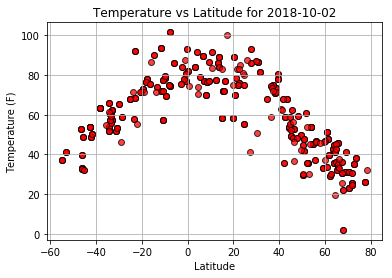

In [5]:
fig, temp_chart = plt.subplots()

temp_chart.grid(True)

plt.scatter(lat, Temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title(f"Temperature vs Latitude for {today}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()



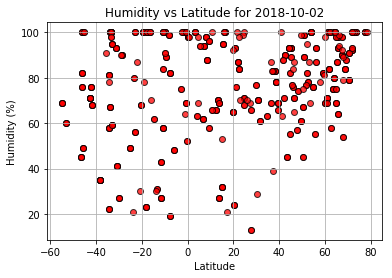

In [6]:
fig, hum_chart = plt.subplots()

hum_chart.grid(True)

plt.scatter(lat, Humidity, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title(f"Humidity vs Latitude for {today}")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()



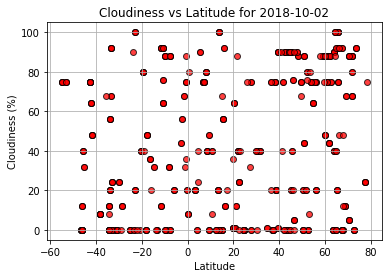

In [7]:
fig, cloud_chart = plt.subplots()

cloud_chart.grid(True)

plt.scatter(lat, Cloudiness, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title(f"Cloudiness vs Latitude for {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

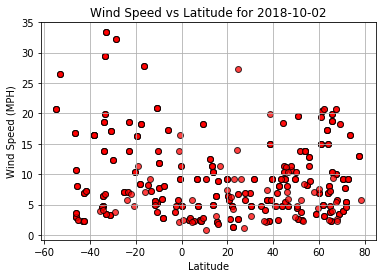

In [8]:
fig, wind_chart = plt.subplots()

wind_chart.grid(True)

plt.scatter(lat, Wind, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title(f"Wind Speed vs Latitude for {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.show()